In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline



In [2]:
import pandas_datareader as pdr
from datetime import datetime

####  1. What was the change in price of the stock over the time?

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [4]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [5]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,191.204502,187.467450,189.359443,189.269323,3.364974e+07,187.963999
std,20.310657,20.061806,20.178071,20.323007,1.455197e+07,20.664970
min,151.550003,146.589996,148.149994,146.830002,1.251390e+07,146.830002
25%,174.949997,172.020004,173.425003,173.139999,2.333825e+07,171.513214
50%,187.399994,184.940002,186.289993,186.050003,3.112420e+07,185.013336
75%,209.375000,205.784996,207.680000,207.760002,4.025700e+07,206.783493
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,231.263092


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-12-26 to 2018-12-24
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


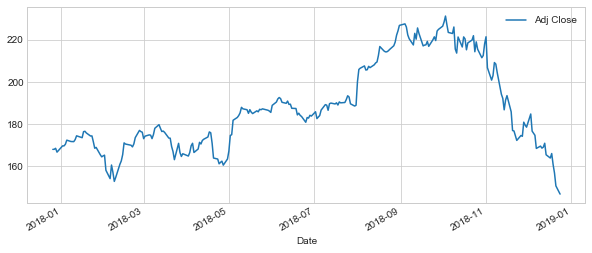

In [8]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

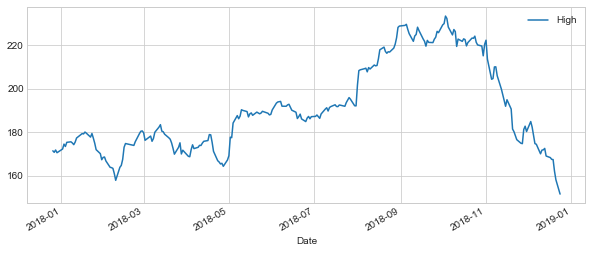

In [12]:
AAPL['High'].plot(legend=True,figsize=(10,4))

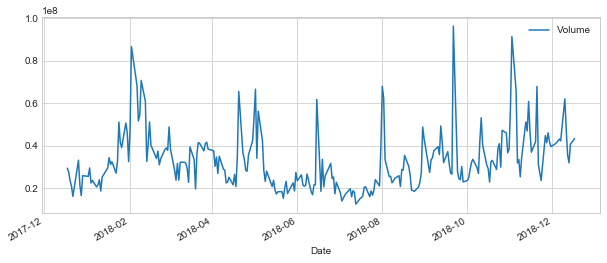

In [14]:
AAPL['Volume'].plot(legend=True,figsize =(10,4))

#### 2. What was the moving average of the various stock?

In [15]:
MA_day = [10,20,60]

for MA in MA_day:
    column_name = 'MA for %s days' %(str(MA))
    AAPL[column_name] = AAPL['Adj Close'].rolling(MA).mean()

AAPL.head(70)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 60 days
Date,,,,,,,,,
2017-12-18,177.199997,174.860001,174.880005,176.419998,29421100.0,173.810547,NaN,NaN,NaN
2017-12-19,175.389999,174.089996,175.029999,174.539993,27436400.0,171.958359,NaN,NaN,NaN
2017-12-20,175.419998,173.250000,174.869995,174.350006,23475600.0,171.771179,NaN,NaN,NaN
2017-12-21,176.020004,174.100006,174.169998,175.009995,20949900.0,172.421402,NaN,NaN,NaN
2017-12-22,175.419998,174.500000,174.679993,175.009995,16114600.0,172.421402,NaN,NaN,NaN
2017-12-26,171.470001,169.679993,170.800003,170.570007,33185500.0,168.047089,NaN,NaN,NaN
2017-12-27,170.779999,169.710007,170.100006,170.600006,21498200.0,168.076645,NaN,NaN,NaN
2017-12-28,171.850006,170.479996,171.000000,171.080002,16480200.0,168.549545,NaN,NaN,NaN
2017-12-29,170.589996,169.220001,170.520004,169.229996,25884400.0,166.726913,NaN,NaN,NaN


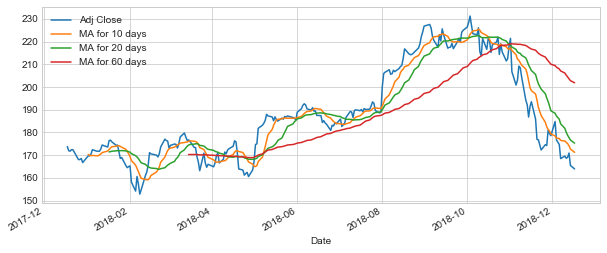

In [17]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 60 days']].plot(legend=True, figsize = (10,4))

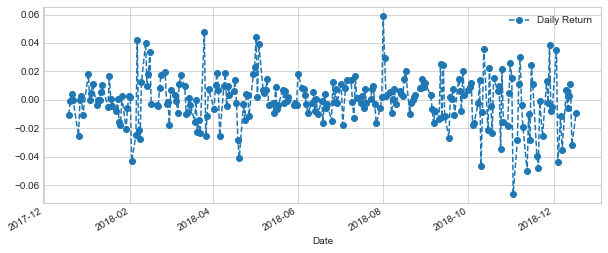

In [18]:
AAPL['Daily Return']= AAPL ['Adj Close'].pct_change()
AAPL['Daily Return'].plot(legend = True,figsize= (10,4),linestyle = '--', marker = 'o')

C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


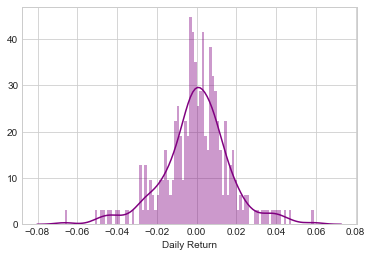

In [20]:
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100,color = 'purple')

In [15]:
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

In [16]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-26,168.047089,1176.760010,1056.739990,83.946770
2017-12-27,168.076645,1182.260010,1049.369995,84.251495
2017-12-28,168.549545,1186.099976,1048.140015,84.261330
2017-12-29,166.726913,1169.469971,1046.400024,84.084389
2018-01-02,169.712067,1189.010010,1065.000000,84.487411


In [17]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-26,NaN,NaN,NaN,NaN
2017-12-27,0.000176,0.004674,-0.006974,0.003630
2017-12-28,0.002814,0.003248,-0.001172,0.000117
2017-12-29,-0.010814,-0.014021,-0.001660,-0.002100
2018-01-02,0.017904,0.016708,0.017775,0.004793


####  comparing the Adj closing values of two stocks

C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


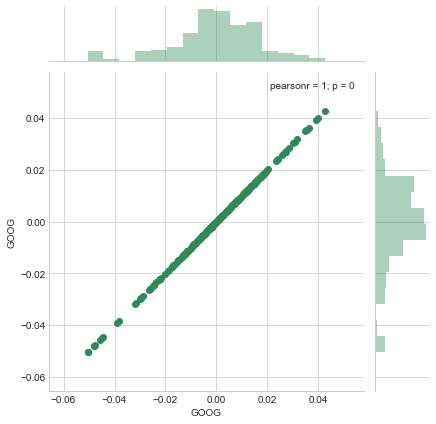

In [18]:
### comparing Google with itself

sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color = 'seagreen')

C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


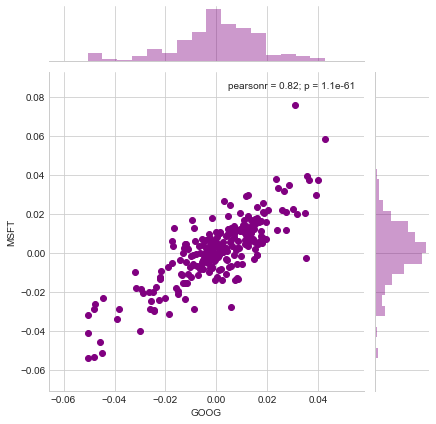

In [24]:
#### comparig Google with Microsoft

sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter',color = 'purple')

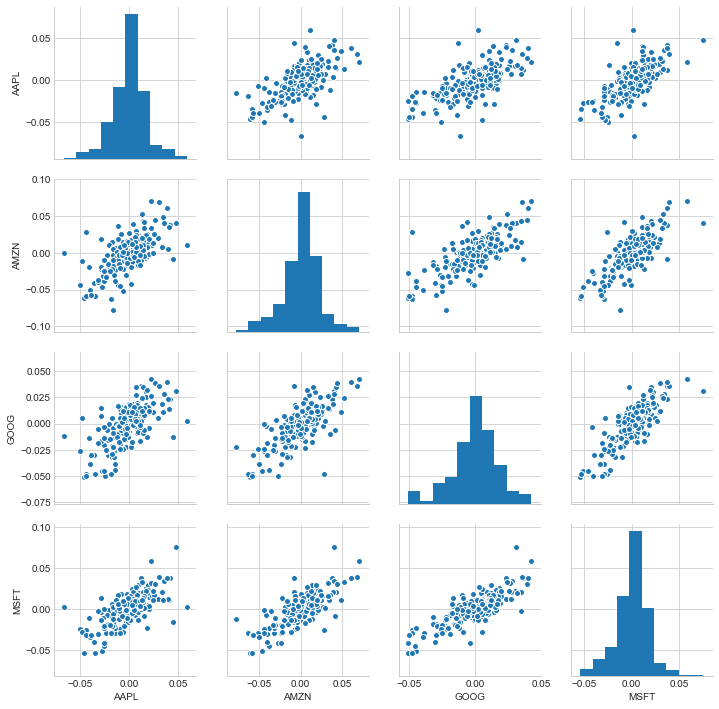

In [19]:
sns.pairplot(tech_rets.dropna())

#### On comparison of the technological sector stocks,we observe that there is a corelation between GOOGLE and MICROSOFT.

C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'camp'
  s)
C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'camp'
  s)
C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'camp'
  s)
C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'camp'
  s)
C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'camp'
  s)
C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'camp'
  s)


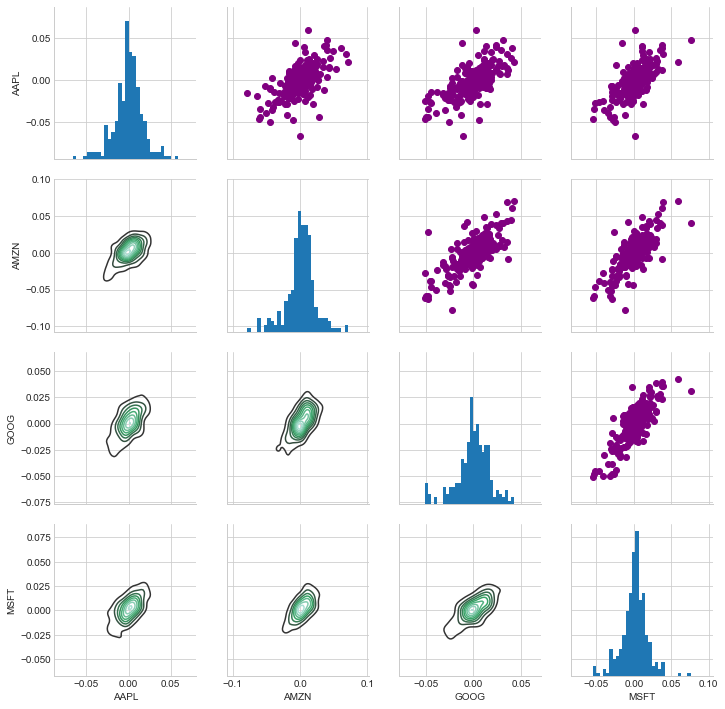

In [25]:
### Plotting a pair grid plot for the percentage change in the stocks of the 4 companies

returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,camp = 'cool_d')
returns_fig.map_diag(plt.hist,bins= 30)

C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'camp'
  s)
C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'camp'
  s)
C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'camp'
  s)
C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'camp'
  s)
C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'camp'
  s)
C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'camp'
  s)


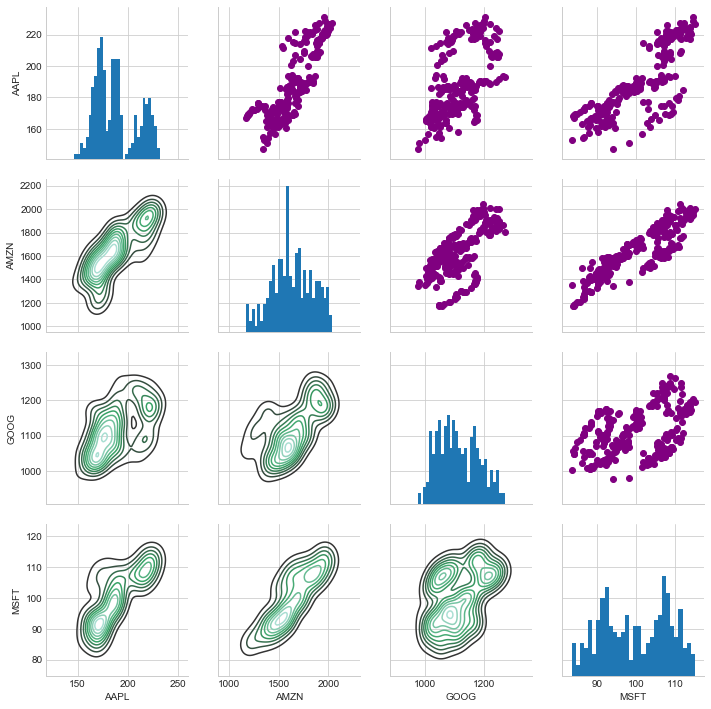

In [20]:
### plotting the pair grid plot on the closing prices of the 4 companies.

returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,camp = 'cool_d')
returns_fig.map_diag(plt.hist,bins= 30)

## Risk Analysis

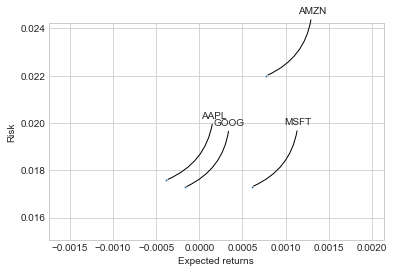

In [32]:
rets = tech_rets.dropna()
area = np.pi*0.2
plt.scatter(rets.mean(),rets.std(),s= area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,xy = (x,y),xytext = (60,60),
                textcoords = 'offset points',ha = 'right', va = 'bottom',
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad = -0.3'))

##### On this analysis we were able to see the comparision between the Expected returns and the Standard Deviation of the annotation i.e, Risk
And we are quite able to see that Google and Apple are at the much lower Risk range also the Expected reuturns are on the downside
however Amazon is at the higher risk range and giving a comparatively better Expected returns from the other 3 stock that we picked from technology sector leading the edge with Microsoft at lower Risk and better Expected returns compared to Google and Apple

In [33]:
rets['AAPL'].quantile(0.050)

-0.029930171748766835

The 0.05 empirical quantile of daily returns is at -0.028. That means with 95% confidence, our worst daily loss will not exceed 2.8%. if we have a 1 million dollar investemnt, our one day our 5 % Value at Risk is 0.028*1,000,000 = $28,000

#### Value at risk using Monte carlo method

In [41]:
#### Monte carlo method carlo for Google 

days  = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu* dt
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
    return price

In [35]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600,1056.739990
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900,1049.369995
2017-12-28,1054.750000,1044.770020,1051.599976,1048.140015,837100,1048.140015
2017-12-29,1049.699951,1044.900024,1046.719971,1046.400024,887500,1046.400024
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000


Text(0.5,1,'Monte Carlo Analysis for Google')

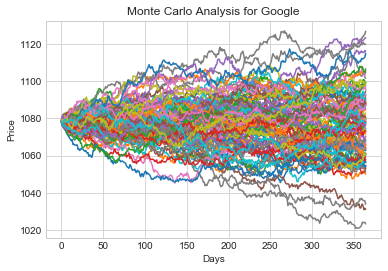

In [39]:
start_price = 1078.489

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [40]:
runs = 10000
simulations  = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

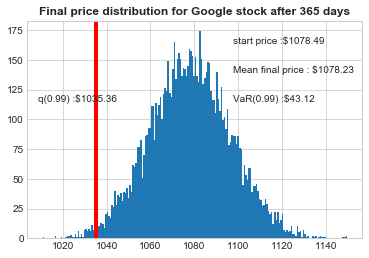

In [96]:
q= np.percentile(simulations,1)
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8, s='start price :$%.2f' %start_price)
plt.figtext(0.6,0.7, 'Mean final price : $%.2f'% simulations.mean())
plt.figtext(0.6,0.6, 'VaR(0.99) :$%.2f' %(start_price - q,))
plt.figtext(0.15,0.6, 'q(0.99) :$%.2f' % q)
plt.axvline(x=q, linewidth =4,color = 'r')
plt.title('Final price distribution for Google stock after %s days'  % days, weight = 'bold');


#### Now we have looked at the 1% empirical quantile of the final price distribution to estimate the value at risk for the GOOGLE stock, which looks to be 43.12 dollars  for every investment of 1078.23 dollars


#### This basically means that for every initial stock you purchase your putting about 43.12 dollars at risk 99% of the time for our monte carlo simulation

In [42]:
#### Monte carlo method for Microsoft

days  = 365
dt = 1/days
mu = rets.mean()['MSFT']
sigma = rets.std()['MSFT']

def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu* dt
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
    return price

In [43]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-26,85.529999,85.029999,85.309998,85.400002,9891200.0,83.946770
2017-12-27,85.980003,85.220001,85.650002,85.709999,14678000.0,84.251495
2017-12-28,85.930000,85.550003,85.900002,85.720001,10594300.0,84.261330
2017-12-29,86.050003,85.500000,85.629997,85.540001,18717400.0,84.084389
2018-01-02,86.309998,85.500000,86.129997,85.949997,22483800.0,84.487411


Text(0.5,1,'Monte Carlo Analysis for Microsoft')

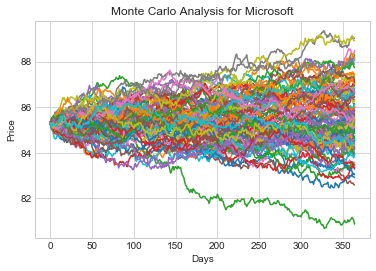

In [45]:
start_price = 85.3

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Microsoft')

In [46]:
runs = 10000
simulations  = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

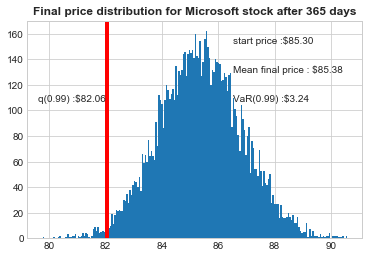

In [47]:
q= np.percentile(simulations,1)
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8, s='start price :$%.2f' %start_price)
plt.figtext(0.6,0.7, 'Mean final price : $%.2f'% simulations.mean())
plt.figtext(0.6,0.6, 'VaR(0.99) :$%.2f' %(start_price - q,))
plt.figtext(0.15,0.6, 'q(0.99) :$%.2f' % q)
plt.axvline(x=q, linewidth =4,color = 'r')
plt.title('Final price distribution for Microsoft stock after %s days'  % days, weight = 'bold');

#### Now we have looked at the 1% empirical quantile of the final price distribution to estimate the value at risk for the MICROSOFT stock, which looks to be 3.24 dollars  for every investment of 85.38 dollars


#### This basically means that for every initial stock you purchase your putting about 3.24 dollars at risk 99% of the time for our monte carlo simulation

In [48]:
#### Monte carlo simulation for Amazon

days  = 365
dt = 1/days
mu = rets.mean()['AMZN']
sigma = rets.std()['AMZN']

def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu* dt
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
    return price

In [49]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-26,1178.319946,1160.550049,1168.359985,1176.760010,2005200,1176.760010
2017-12-27,1187.290039,1175.609985,1179.910034,1182.260010,1867200,1182.260010
2017-12-28,1190.099976,1184.380005,1189.000000,1186.099976,1841700,1186.099976
2017-12-29,1184.000000,1167.500000,1182.349976,1169.469971,2688400,1169.469971
2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010


Text(0.5,1,'Monte Carlo Analysis for Amazon')

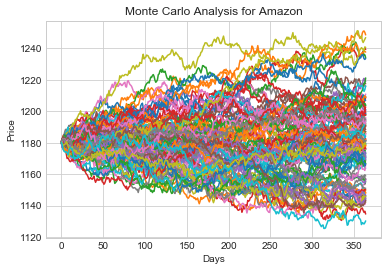

In [52]:
start_price = 1180.319

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Amazon')

In [53]:
runs = 10000
simulations  = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

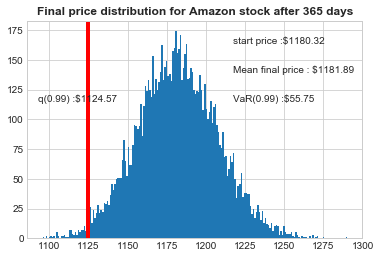

In [54]:
q= np.percentile(simulations,1)
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8, s='start price :$%.2f' %start_price)
plt.figtext(0.6,0.7, 'Mean final price : $%.2f'% simulations.mean())
plt.figtext(0.6,0.6, 'VaR(0.99) :$%.2f' %(start_price - q,))
plt.figtext(0.15,0.6, 'q(0.99) :$%.2f' % q)
plt.axvline(x=q, linewidth =4,color = 'r')
plt.title('Final price distribution for Amazon stock after %s days'  % days, weight = 'bold');

#### Now we have looked at the 1% empirical quantile of the final price distribution to estimate the value at risk for the AMAZON stock, which looks to be 55.75 dollars  for every investment of 1181.89 dollars


#### This basically means that for every initial stock you purchase your putting about 55.75 dollars at risk 99% of the time for our monte carlo simulation